In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
# the idea is to have a lot of weights and biases to work with to understand xaviea and kaimer inits
class model(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(100,100)
        self.fc1 = nn.Linear(100,100)
        self.fc2 = nn.Linear(100,100)
        self.fc2 = nn.Linear(100,100)
        self.output = nn.Linear(100,2)
        # default inits follows kaimer
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.output(x))
        return x
        

In [3]:
net =  model()
print(net)

model(
  (input): Linear(in_features=100, out_features=100, bias=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)


In [4]:
#  get the weights and biases
weights = np.array([])
biases = np.array([])

In [5]:
for i in net.named_parameters():
    if "bias" in i[0]:
        print(i[0])

input.bias
fc1.bias
fc2.bias
output.bias


In [36]:
for i in net.named_parameters():
    if "bias" in i[0]:
        biases = np.concatenate((biases, (i[1].data.numpy().flatten())), axis=0)
    elif "weight" in i[0]:
        weights = np.concatenate((weights, (i[1].data.numpy().flatten())), axis=0)

In [51]:
print(f"no of biases: {len(biases)}")
print(f"no of weights: {len(weights)}")

no of biases: 604
no of weights: 30200


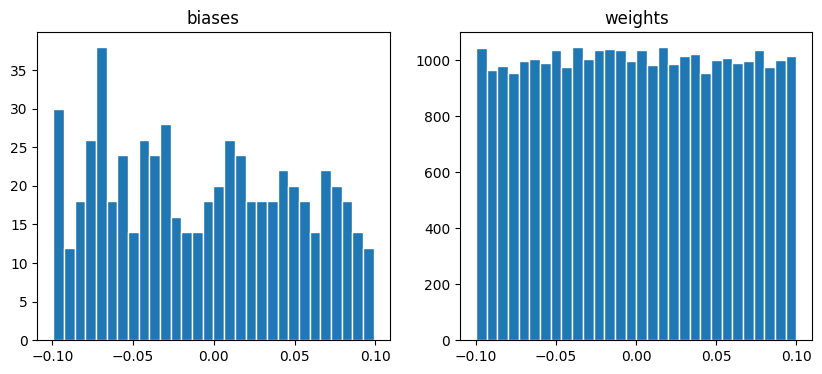

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(biases, edgecolor="white", bins=30)
ax[0].set_title("biases")
ax[1].hist(weights, edgecolor="white", bins=30)
ax[1].set_title("weights")
plt.show()



The graphs looks different because of the sampling variability, look at the frequecy scale in both the plot (yaxis)

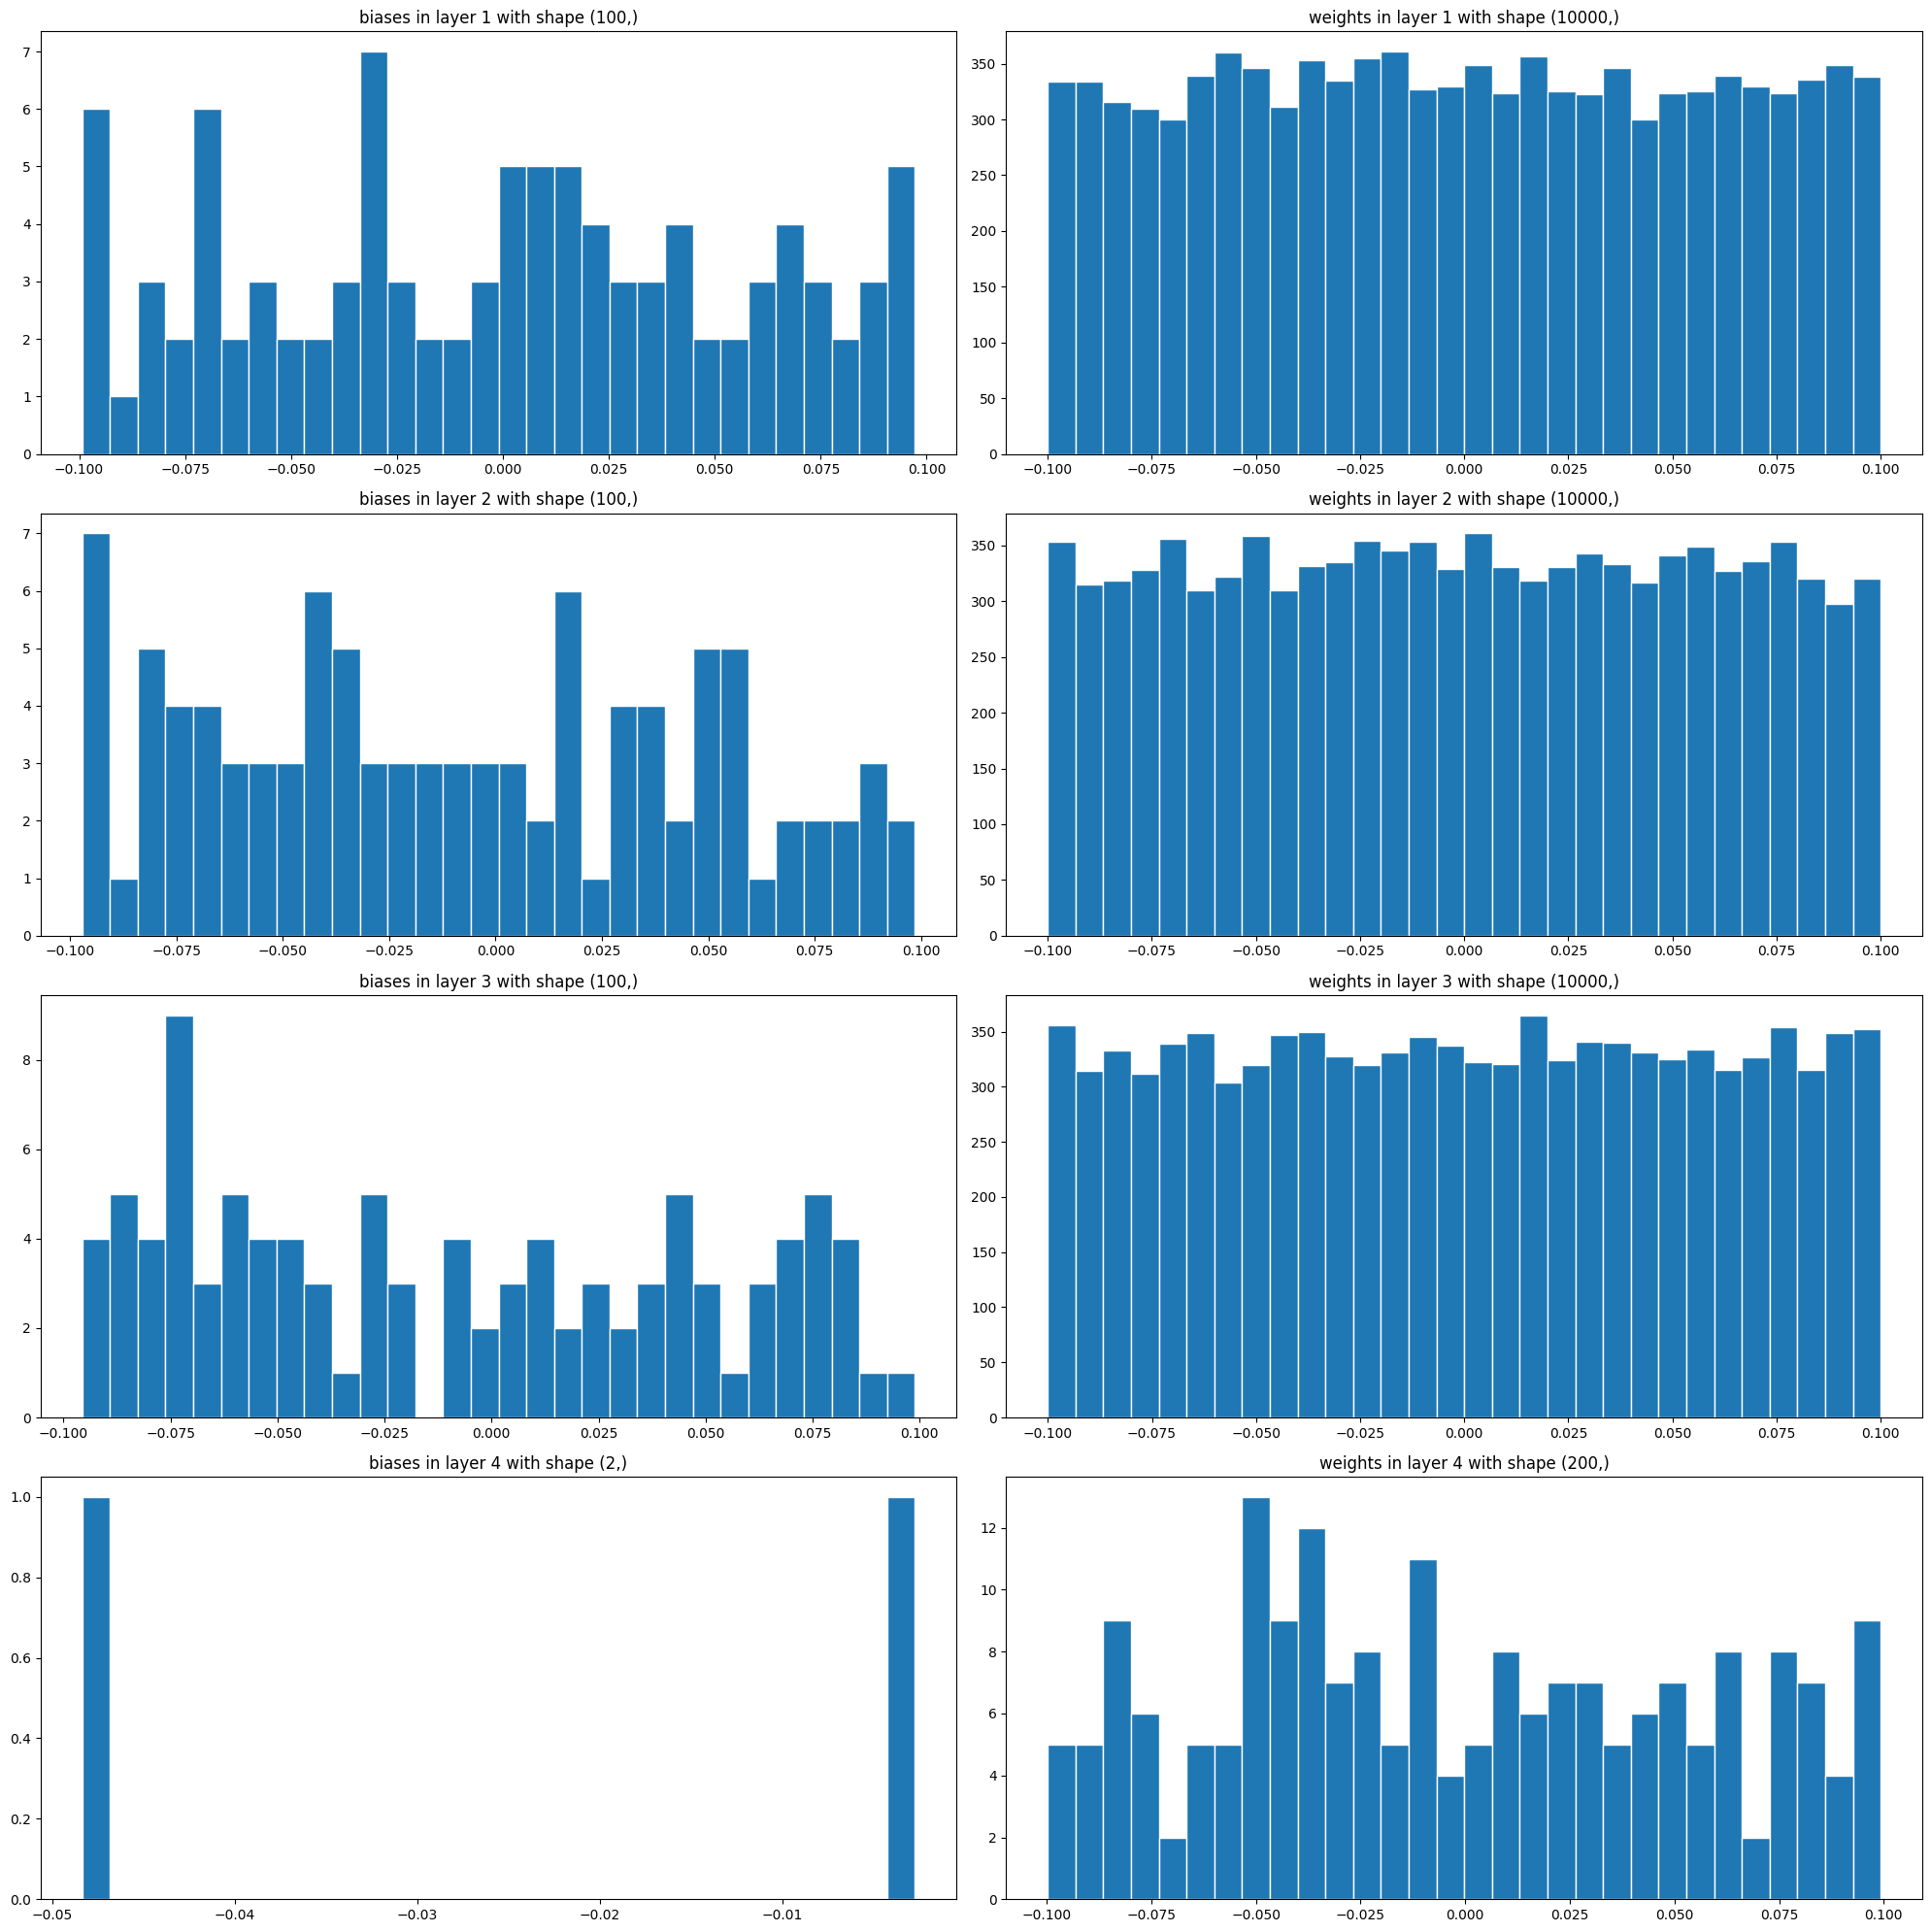

In [131]:
#  weights and biases at different layers
fig, ax = plt.subplots(4, 2, figsize=(20,20))
for i, j in enumerate(net.named_parameters()):
    row = int(np.floor(i/2))
    if "bias" in j[0]:
        ax[row, 0].hist(j[1].data.numpy(), edgecolor="white", bins=30)
        ax[row, 0].set_title(f"biases in layer {row+1} with shape {j[1].data.numpy().shape}")
    elif "weight" in j[0]:
        ax[row, 1].hist(np.concatenate(j[1].data.numpy()), edgecolor="white", bins=30)
        ax[row, 1].set_title(f"weights in layer {row+1} with shape {np.concatenate(j[1].data.numpy()).shape}")
fig.tight_layout()
plt.show()

In [132]:
# changing just the weights to xavier inits
for i in net.named_parameters():
    if "weight" in i[0]:
        nn.init.xavier_normal_(i[1].data) # different way to use inplace
    # elif "bias" in i[0]:
    #     nn.init.xavier_normal_(i[1].data)

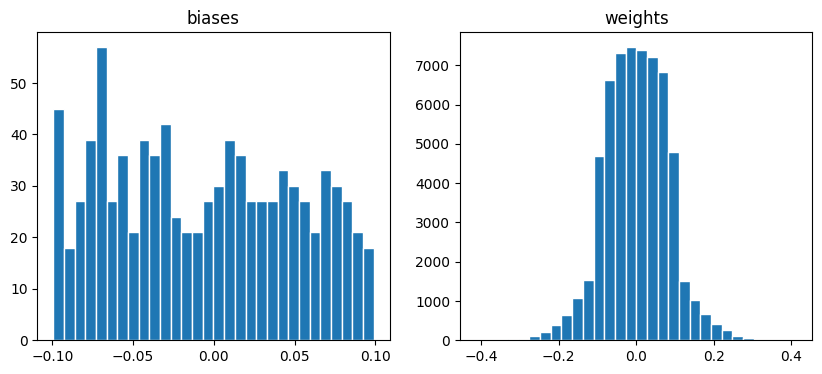

In [133]:
for i in net.named_parameters():
    if "bias" in i[0]:
        biases = np.concatenate((biases, (i[1].data.numpy().flatten())), axis=0)
    elif "weight" in i[0]:
        weights = np.concatenate((weights, (i[1].data.numpy().flatten())), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(biases, edgecolor="white", bins=30)
ax[0].set_title("biases")
ax[1].hist(weights, edgecolor="white", bins=30)
ax[1].set_title("weights")
plt.show()

You can see the weights are now initialized based on xavier (it is not uniform anymore)

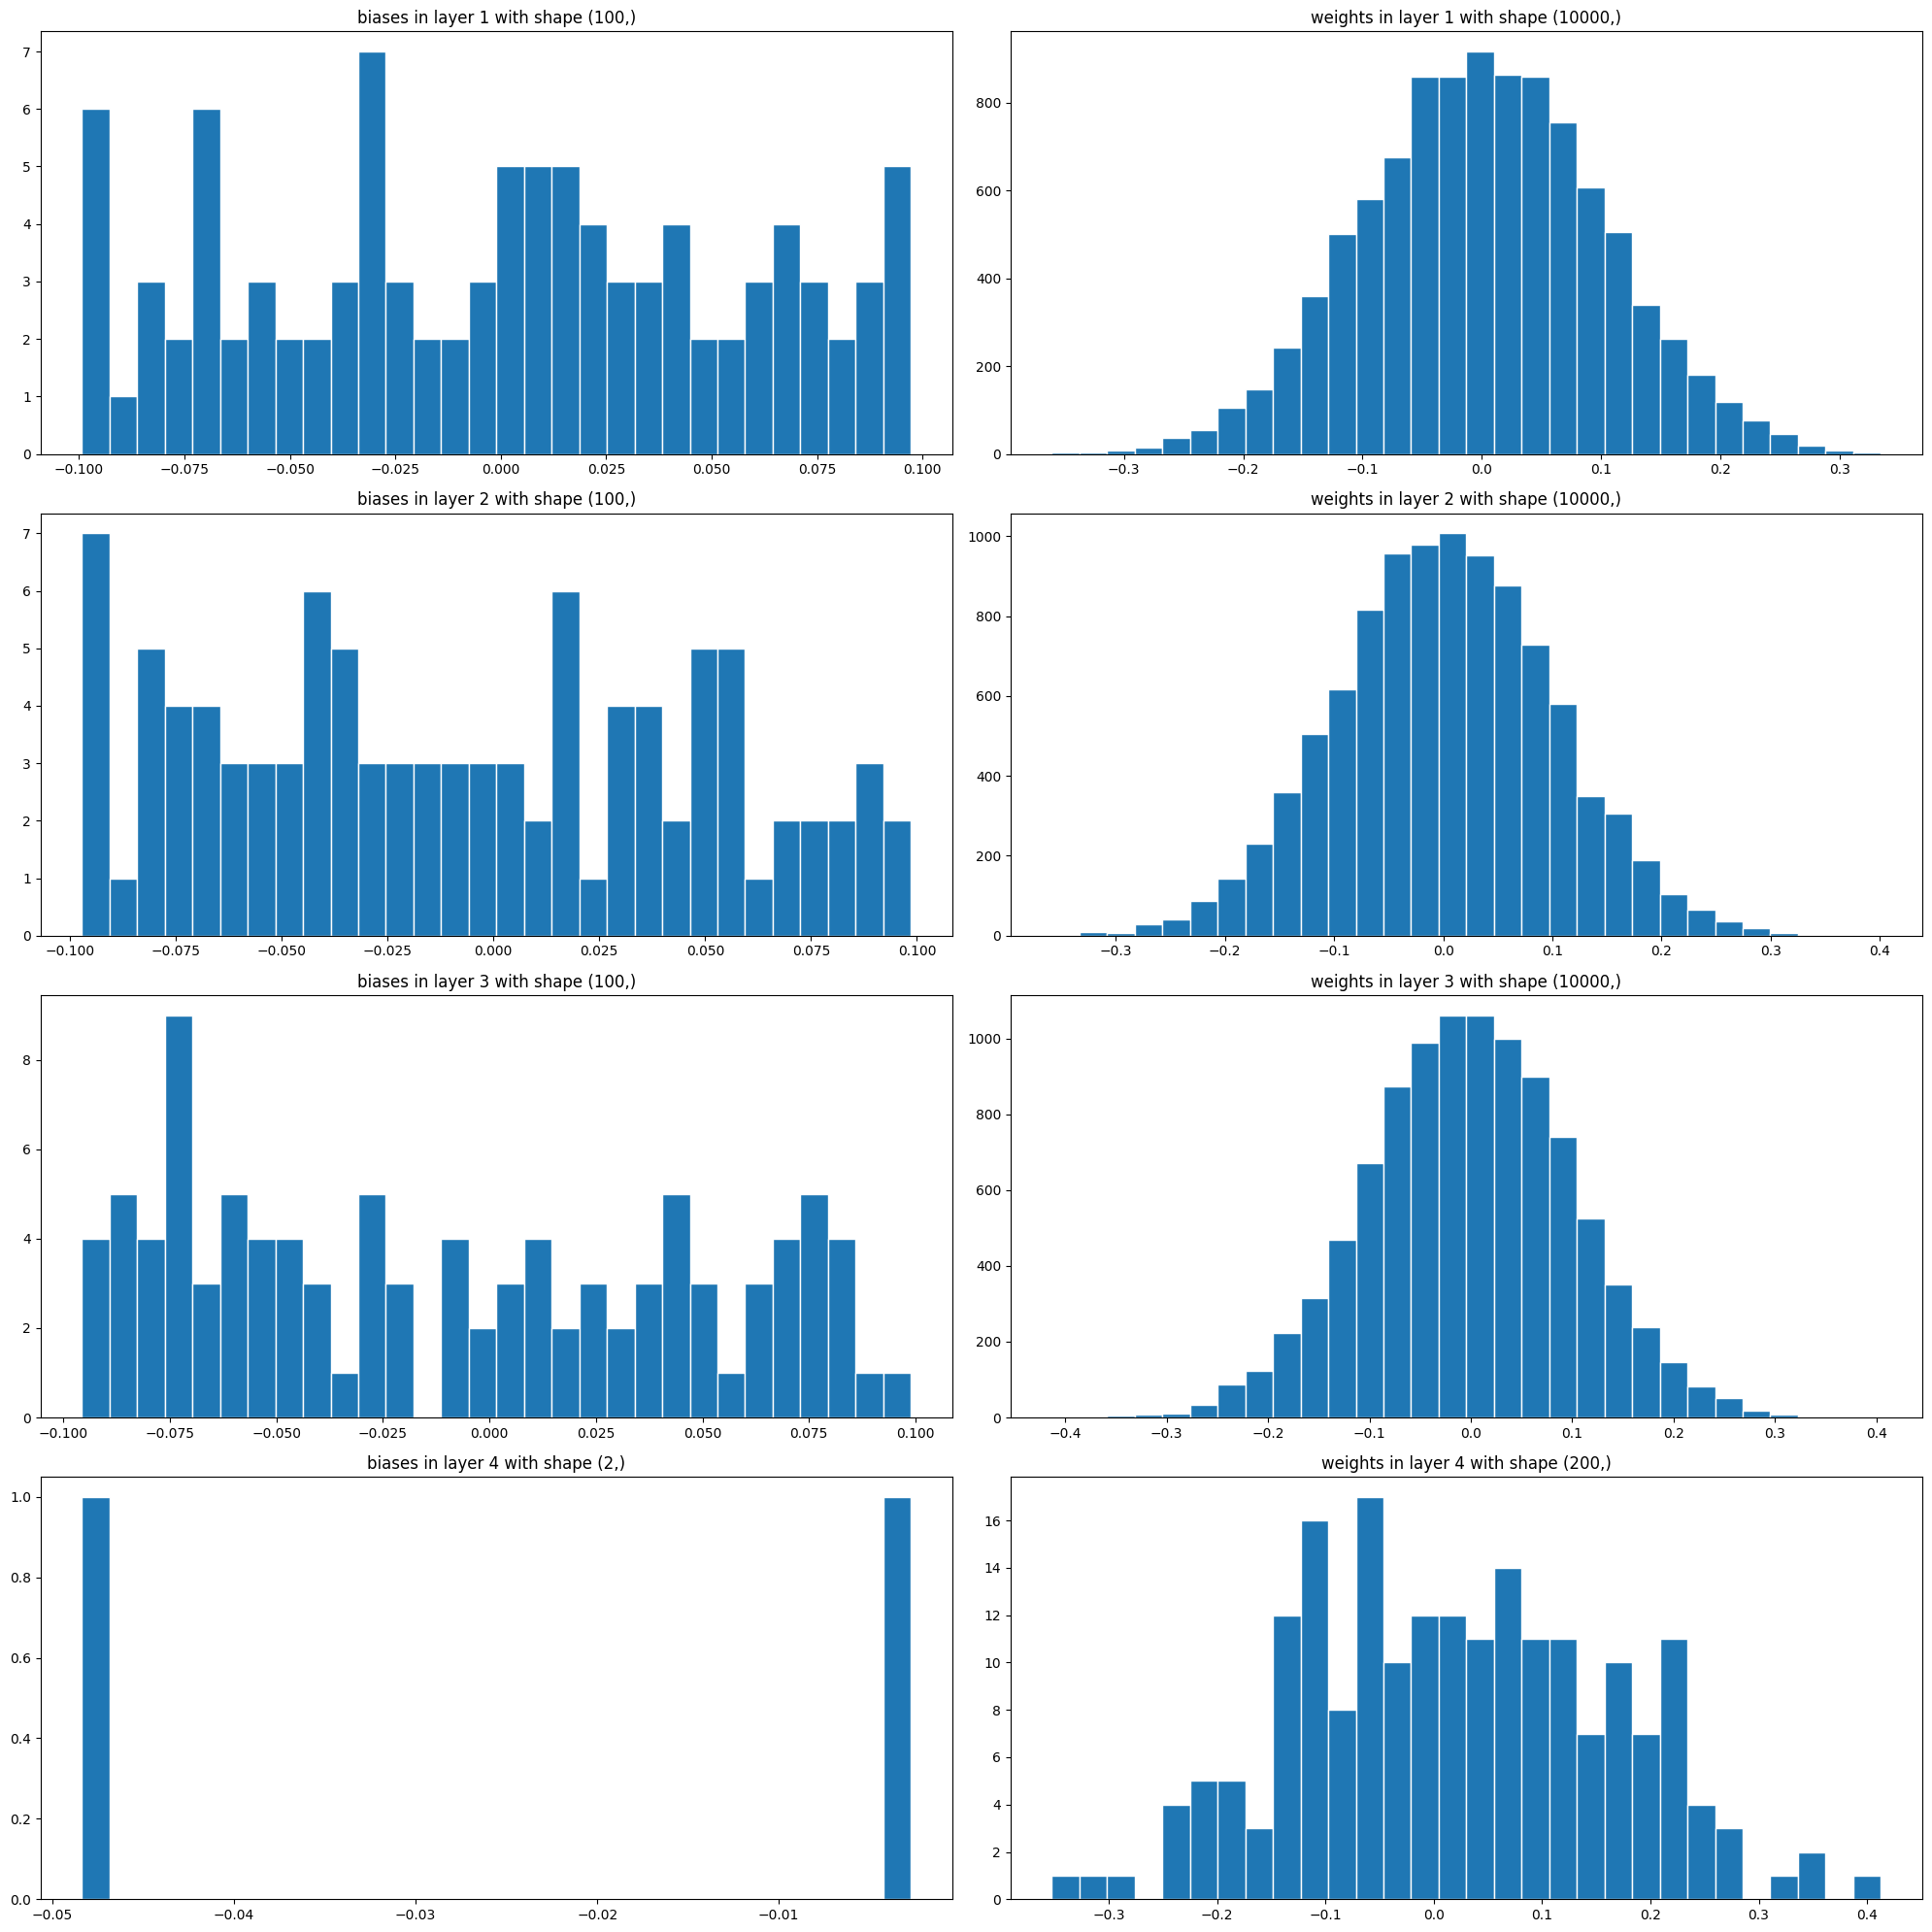

In [134]:
#  weights and biases at different layers
fig, ax = plt.subplots(4, 2, figsize=(20,20))
for i, j in enumerate(net.named_parameters()):
    row = int(np.floor(i/2))
    if "bias" in j[0]:
        ax[row, 0].hist(j[1].data.numpy(), edgecolor="white", bins=30)
        ax[row, 0].set_title(f"biases in layer {row+1} with shape {j[1].data.numpy().shape}")
    elif "weight" in j[0]:
        ax[row, 1].hist(np.concatenate(j[1].data.numpy()), edgecolor="white", bins=30)
        ax[row, 1].set_title(f"weights in layer {row+1} with shape {np.concatenate(j[1].data.numpy()).shape}")
fig.tight_layout()
plt.show()